In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle 


C:\Users\nivas\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nivas\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\nivas\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)


In [3]:
X_train, y_train = train['features'], train['labels'] 
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_test.shape

(12630, 32, 32, 3)

1

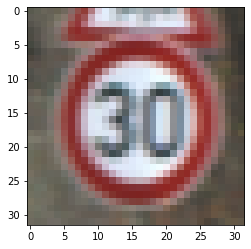

In [7]:
#Image Exploration
i = 3404
plt.imshow(X_train[i])
y_train[i]

33

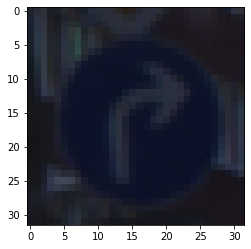

In [8]:
plt.imshow(X_validation[i])
y_validation[i]

9

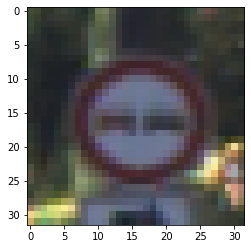

In [9]:
plt.imshow(X_test[i])
y_test[i]

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [11]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)

In [12]:
X_train_gray.shape

(34799, 32, 32, 1)

In [13]:
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
    

In [14]:
X_test_gray.shape

(12630, 32, 32, 1)

In [15]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [16]:
X_train_gray_norm = (X_train_gray - 128)/128

In [17]:
X_test_gray_norm = (X_test_gray-128)/128

In [18]:
X_validation_gray_norm = (X_validation_gray-128)/128

In [19]:
X_test_gray_norm.shape

(12630, 32, 32, 1)

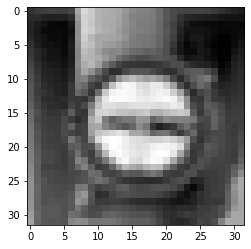

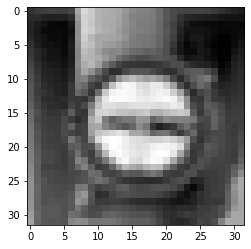

In [20]:
i = 520 
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [21]:
#Model Training

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation ='relu'))
cnn_model.add(Dense(units = 84, activation ='relu'))

cnn_model.add(Dense(units = 43, activation ='softmax'))

In [23]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'] )

In [34]:
history = cnn_model.fit(X_train_gray_norm, y_train, batch_size = 500, epochs = 5, verbose = 1, validation_data = (X_validation_gray_norm, y_validation) )

Epoch 1/5
70/70 [==============================] - 10s 145ms/step - loss: 0.4199 - accuracy: 0.8908 - val_loss: 0.6663 - val_accuracy: 0.8009
Epoch 2/5
70/70 [==============================] - 10s 146ms/step - loss: 0.3534 - accuracy: 0.9084 - val_loss: 0.6105 - val_accuracy: 0.8261
Epoch 3/5
70/70 [==============================] - 13s 180ms/step - loss: 0.3061 - accuracy: 0.9239 - val_loss: 0.6182 - val_accuracy: 0.8261
Epoch 4/5
70/70 [==============================] - 12s 176ms/step - loss: 0.2736 - accuracy: 0.9306 - val_loss: 0.5913 - val_accuracy: 0.8320
Epoch 5/5
70/70 [==============================] - 12s 172ms/step - loss: 0.2387 - accuracy: 0.9395 - val_loss: 0.5926 - val_accuracy: 0.8340


In [35]:
#Model evaluation
score = cnn_model.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.8517 - accuracy: 0.8342


In [36]:
print('Test accuracy: {}'.format(score[1]))

Test accuracy: 0.8342042565345764


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']


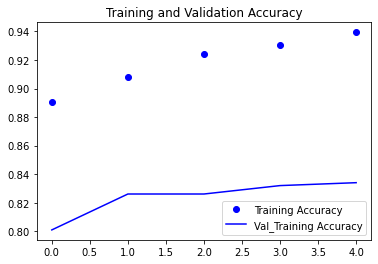

In [43]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Val_Training Accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()

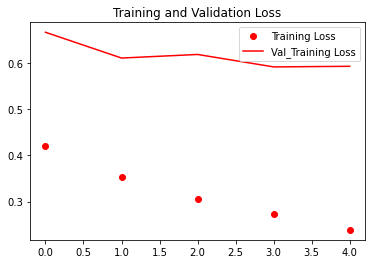

In [48]:
epochs = range(len(loss))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Val_Training Loss')

plt.title('Training and Validation Loss')
plt.legend()

In [56]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test 

C:\Users\nivas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:459: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [57]:
y_true, predicted_classes[1]

(array([16,  1, 38, ...,  6,  7, 10], dtype=uint8), 1)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)


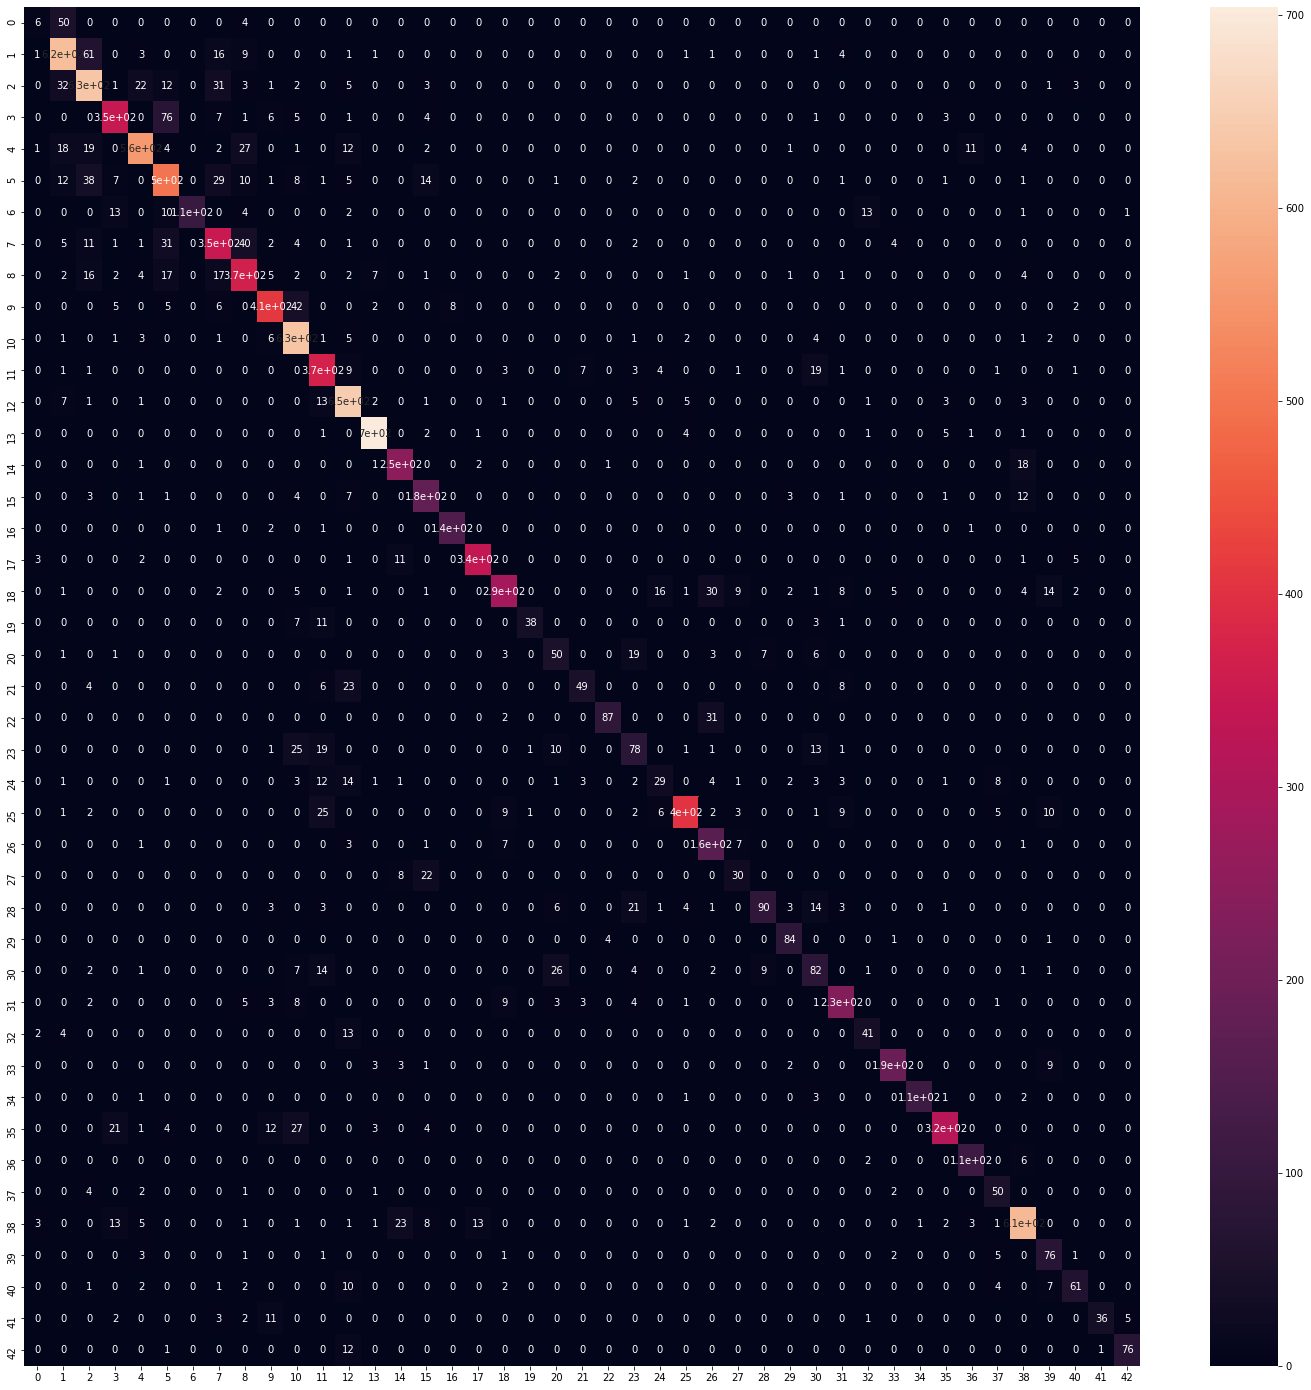

In [59]:
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)